# Exploratory Data Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Explore-Images-In-Dataset" data-toc-modified-id="Explore-Images-In-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore Images In Dataset</a></span><ul class="toc-item"><li><span><a href="#Examine-sample-image-of-cracked-concrete" data-toc-modified-id="Examine-sample-image-of-cracked-concrete-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examine sample image of cracked concrete</a></span></li><li><span><a href="#Examine-sample-image-of-not-cracked-concrete" data-toc-modified-id="Examine-sample-image-of-not-cracked-concrete-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Examine sample image of not cracked concrete</a></span></li></ul></li><li><span><a href="#Plot-Colorspace" data-toc-modified-id="Plot-Colorspace-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot Colorspace</a></span><ul class="toc-item"><li><span><a href="#Colors-Of-&quot;Not-Cracked&quot;-Concrete" data-toc-modified-id="Colors-Of-&quot;Not-Cracked&quot;-Concrete-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Colors Of "Not-Cracked" Concrete</a></span></li><li><span><a href="#Colors-Of-&quot;Cracked&quot;-Concrete" data-toc-modified-id="Colors-Of-&quot;Cracked&quot;-Concrete-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Colors Of "Cracked" Concrete</a></span></li></ul></li></ul></div>

___

## Setup

In [64]:
# Import necessary python packages and functions

from __future__ import print_function
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import math
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LassoCV, Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score, precision_recall_curve, precision_recall_fscore_support
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from pprint import pprint
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model, Input, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras import backend, layers, models
from PIL import Image
import imageio
import os
%matplotlib inline

In [65]:
#Expanding max range in Pandas (common practice)
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

In [66]:
# This is to avoid getting hundreds of log messages
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

___

## Explore Images In Dataset

### Examine sample image of cracked concrete

(1, 256, 256, 3)


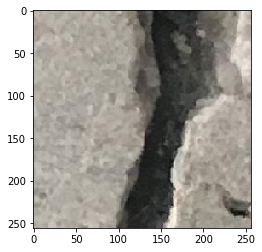

In [67]:
img_1 = '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Train/Cracked/11000.jpg'

cracked = image.load_img(img_1, target_size=(256, 256))
cracked_tensor = image.img_to_array(cracked)
cracked_tensor = np.expand_dims(cracked_tensor, axis=0)

#Follow the Original Model Preprocessing
cracked_tensor /= 255

#Check tensor shape
print(cracked_tensor.shape)

#Preview an image
plt.imshow(cracked_tensor[0])
plt.show()

In [68]:
cracked_tensor = cracked_tensor.reshape(256 * 256, 3)
cracked_tensor.shape

(65536, 3)

### Examine sample image of not cracked concrete

(1, 256, 256, 3)


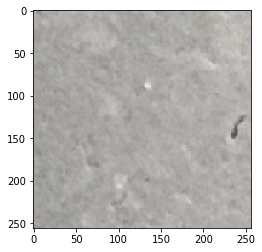

In [69]:
img_2 = '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Train/Not Cracked/00001.jpg'

not_cracked = image.load_img(img_2, target_size=(256, 256))
not_cracked_tensor = image.img_to_array(not_cracked)
not_cracked_tensor = np.expand_dims(not_cracked_tensor, axis=0)

#Follow the Original Model Preprocessing
not_cracked_tensor /= 255

#Check tensor shape
print(not_cracked_tensor.shape)

#Preview an image
plt.imshow(not_cracked_tensor[0])
plt.show()

In [70]:
not_cracked_tensor = not_cracked_tensor.reshape(256 * 256, 3)
not_cracked_tensor.shape

(65536, 3)

___

## Plot Colorspace

In [76]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rs = np.random.RandomState(0)
    i = rs.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

### Colors Of "Not-Cracked" Concrete 

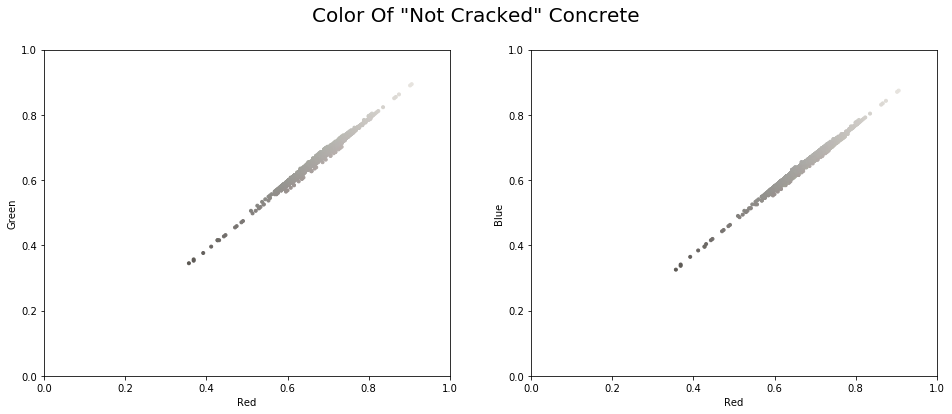

In [77]:
plot_pixels(not_cracked_tensor, title='Color Of "Not Cracked" Concrete')

### Colors Of "Cracked" Concrete 

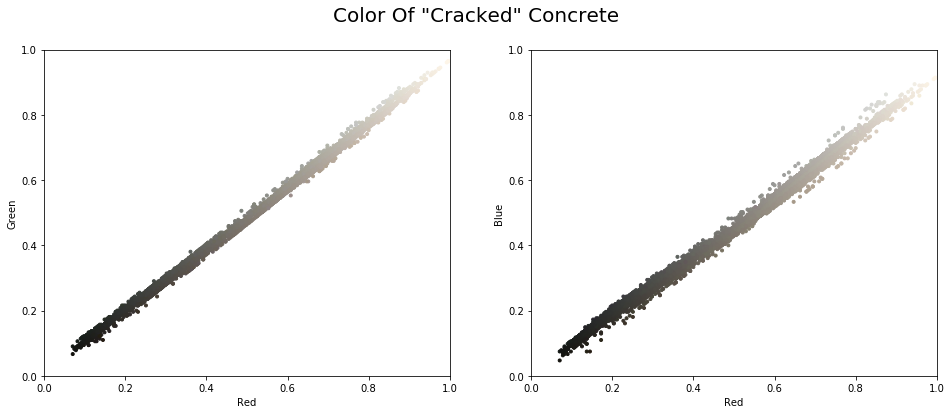

In [78]:
plot_pixels(cracked_tensor, title='Color Of "Cracked" Concrete')

**NOTES**
- It looks like "cracked" concrete has a much wider range of color values - particularly in blacks.
- This makes sense - cracks are usually in shadow and typically darker than the rest of the surface.
- Blacks represent low numerical values in Red, Green, and Blue colorspace.
- This is probably a feature that the neural network will look for.